## Okay so the goal here is to do a simple regression with tensorflow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# tf.enable_eager_execution()
%matplotlib inline

/usr/local/Homebrew/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0.5,1,'Wierd Function')

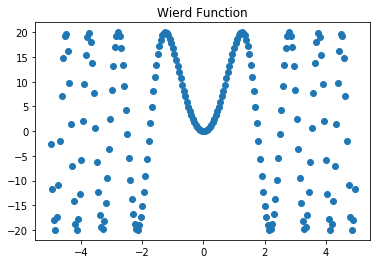

In [2]:
xs = np.arange(-5, 5, 0.05) # shape: (67,)
ys = 20 * np.sin(xs ** 2) # shape: (67,)
plt.scatter(xs, ys)
plt.title("Wierd Function")

In [3]:
np.expand_dims(xs, axis=1).shape

(200, 1)

In [4]:
# Define the model
x = tf.placeholder(tf.float32)
W1 = tf.Variable(tf.random_normal([1, 100]))
b1 = tf.Variable(tf.random_normal([100]))
y1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
y2 = tf.reduce_sum(y1, axis=1)

In [10]:
sess = tf.Session()
answer = tf.placeholder(tf.float32)
loss = tf.reduce_sum(tf.pow(answer - y2, 2))
step = tf.train.AdamOptimizer(1e-3).minimize(loss)
sess.run(tf.global_variables_initializer())
for i in range(30000):
    if i % 1000 == 0:
        print ("Step {} of {} --> loss = {}".format(i, 30000, \
                                sess.run(loss, feed_dict={x: np.expand_dims(xs, axis=1), answer: ys})))
    sess.run(step, feed_dict={x: np.expand_dims(xs, axis=1), answer: ys})

Step 0 of 30000 --> loss = 36895.6328125
Step 1000 of 30000 --> loss = 29520.15234375
Step 2000 of 30000 --> loss = 27862.7578125
Step 3000 of 30000 --> loss = 26373.6171875
Step 4000 of 30000 --> loss = 25073.421875
Step 5000 of 30000 --> loss = 23987.0859375
Step 6000 of 30000 --> loss = 23115.798828125
Step 7000 of 30000 --> loss = 22413.041015625
Step 8000 of 30000 --> loss = 21862.904296875
Step 9000 of 30000 --> loss = 21412.939453125
Step 10000 of 30000 --> loss = 21011.189453125
Step 11000 of 30000 --> loss = 20695.9375
Step 12000 of 30000 --> loss = 20439.640625
Step 13000 of 30000 --> loss = 20097.859375
Step 14000 of 30000 --> loss = 19853.2265625
Step 15000 of 30000 --> loss = 19639.283203125
Step 16000 of 30000 --> loss = 19450.353515625
Step 17000 of 30000 --> loss = 19269.6015625
Step 18000 of 30000 --> loss = 19099.55859375
Step 19000 of 30000 --> loss = 18947.59375
Step 20000 of 30000 --> loss = 18803.14453125
Step 21000 of 30000 --> loss = 18664.671875
Step 22000 of 3

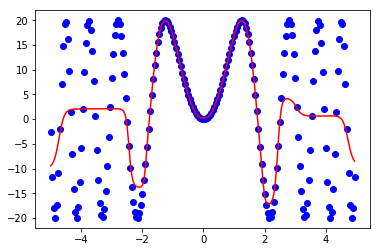

In [11]:
ys_model = sess.run(y2, feed_dict={x: np.expand_dims(xs, axis=1)})
plt.scatter(xs, ys, color='blue')
plt.plot(xs, ys_model, color='red')

As we can see from the above graph, I have succeeded somewhat in performing regression with a neural-network type object. The network consists of one hidden layer, of 100 neurons, using a tanh activation function, and a final output neuron which simply sums over the activations of the hidden layer. I used the AdamOptimizer with a step size of 1e-3, and used a difference-squared error function. More to come!